<a href="https://www.kaggle.com/code/krviswanathan/house-prices-data-analysis-and-predictions?scriptVersionId=112932942" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Setup

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

#pd.set_option('display.max_columns', None)

# 2. Data Set Info

In [2]:
# Load the train and test data sets
df_train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
# The 'Id' column is same as the index. Hence it can be dropped
train = df_train.drop('Id', axis=1)
test = df_test.drop('Id', axis=1)

In [4]:
# The train and test data sets are merged into a single dataframe for data cleaning.
# Each data set is assigned a column called "ind" which would be useful for
# splitting the dataframe into train and test for machine learning.
df = pd.concat([train.assign(ind="train"), test.assign(ind="test")])

# Display the sample of the dataframe
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


In [5]:
# Basic information about the combined dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [6]:
# Statistics for numerical columns of the dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


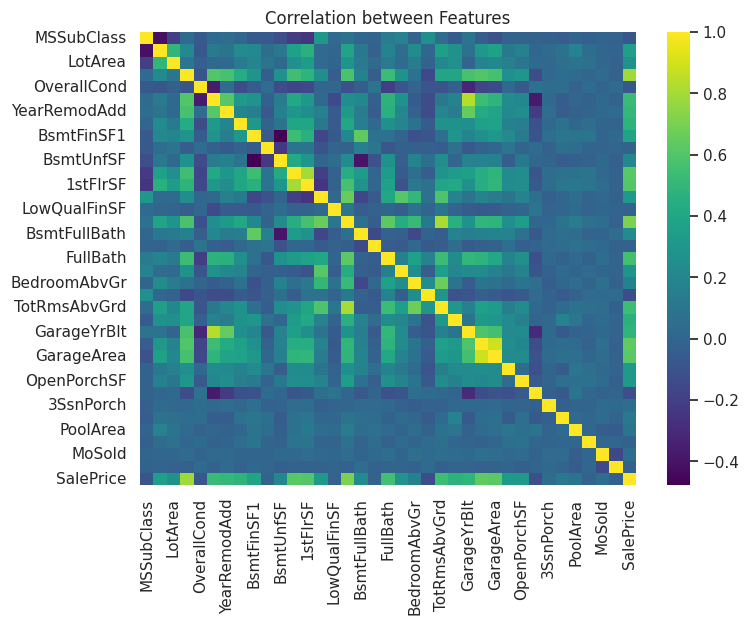

In [7]:
# Heat map visualization
plt.figure(figsize=(8,6), dpi=100)
sns.heatmap(df.corr(), cmap='viridis')
plt.title("Correlation between Features");

The above heatmap visualization displays the correlation of features. As `SalePrice` column is the target variable, it is better to find the correlation between the `SalePrice` label and other features.

In [8]:
# Correlation between SalePrice and Feature columns
SalePrice_corr = df.corr()['SalePrice'].sort_values()[:-1]
print(f'Correlation of SalePrice with Features: \n\n{SalePrice_corr}')

Correlation of SalePrice with Features: 

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
Name: SalePrice, dtype

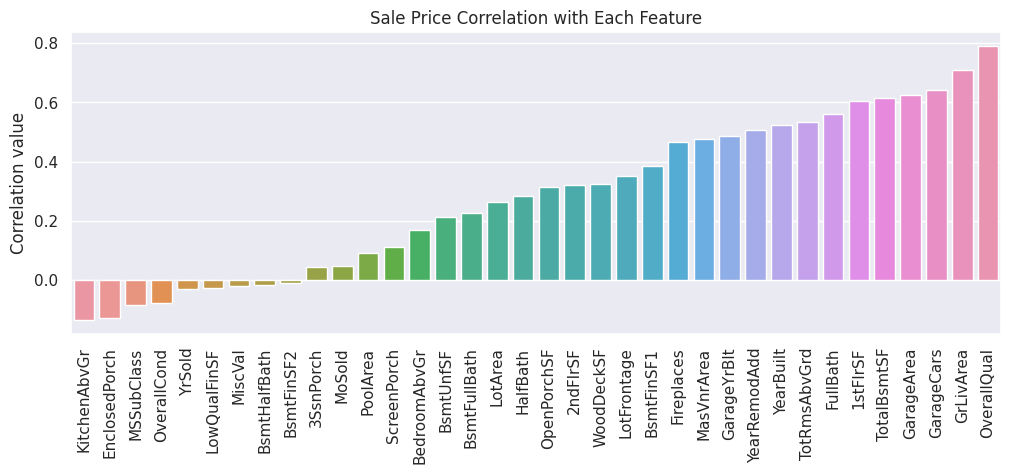

In [9]:
# Plot Correlation of Sale Price with other Feature Columns
fig, ax = plt.subplots(figsize=(12, 4), dpi=100)
ax = sns.barplot(x=SalePrice_corr.index, y=SalePrice_corr.values)
plt.title("Sale Price Correlation with Each Feature")
plt.ylabel("Correlation value")
plt.xticks(rotation=90);

From the above barplot, for the `SalePrice` label, the features such as `OverallQual`, `GrLivArea`, `GarageCars`, and `GarageArea` are highly correlated. These variables are highly important in deciding the sale price of a house.

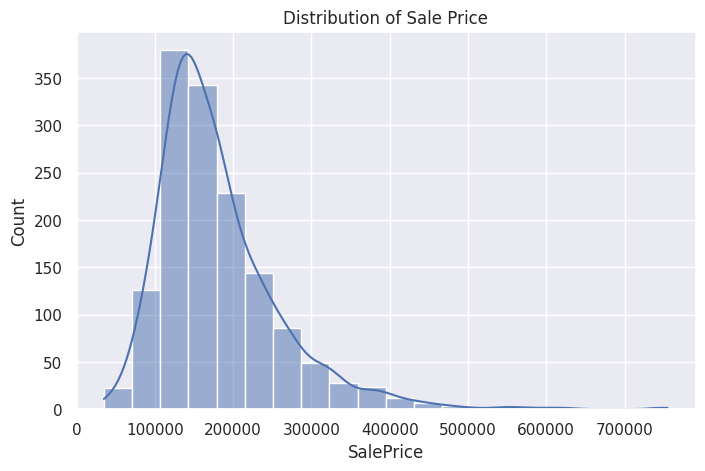

In [10]:
# Plot distribution of Sale Price
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
ax = sns.histplot(df['SalePrice'], bins=20, kde=True)
plt.title("Distribution of Sale Price");



# 3. Dealing with Outliers

In a dataset, any observation that lies far away from the rest of the values is considered an outlier. To obtain good results in the data analysis, outliers have to be taken care of. Let's plot some visualizations between the highly correlated features with sale price to get some insight into outliers.  

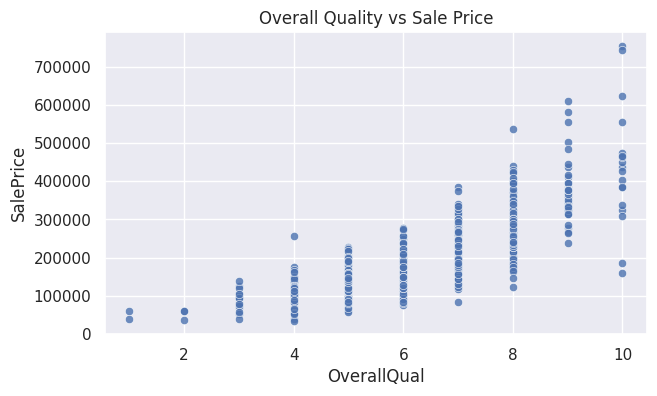

In [11]:
# Plot Overall Quality vs Sale Price
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
ax = sns.scatterplot(data=df, y='SalePrice', x='OverallQual', alpha=0.8)
plt.title("Overall Quality vs Sale Price");

From the above scatter plot, it can be seen that, as the overall quality increases, the sale price of the house also increases. However, from the above plot, it looks like some houses have overall quality above 8 but have lower sale price.

In [12]:
# Finding the outliers
df[(df['OverallQual'] > 8) & (df['SalePrice'] < 200000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,NaN,NaN,NaN,0,10,2007,New,Partial,184750.0,train
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,Gd,NaN,NaN,0,1,2008,New,Partial,160000.0,train


Next to `OverallQual` column, the `GrLivArea` column is highly correlated with `SalePrice` and the relationship is plotted below.

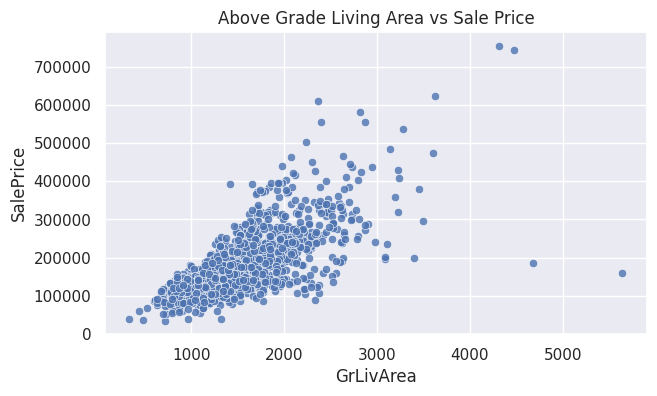

In [13]:
# Plot Above Grade Living Area vs Sale Price
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
ax = sns.scatterplot(data=df, y='SalePrice', x='GrLivArea', alpha=0.8)
plt.title("Above Grade Living Area vs Sale Price");

The relationship between the Above Grade Living Area and the Sale Price is linear but there are some outliers. The sale price goes up with an increase in living area and an increase in overall quality.

However, few houses are available at a price less than $300000 for Ground Living Area of above 4000 sq. feet.

In [14]:
df[((df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,NaN,NaN,NaN,0,10,2007,New,Partial,184750.0,train
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,Gd,NaN,NaN,0,1,2008,New,Partial,160000.0,train


The index 523 and index 1298 of the train data set are the common outliers based on above visualizations. These can be removed as they lie far from the rest of the observations.

In [15]:
# Removing those houses data as they might distort predictions
df = df[~((df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000))]

print("The new shape of the dataframe is : ", df.shape)

The new shape of the dataframe is :  (2917, 81)


### Visualizing other highly correlated features with sale price

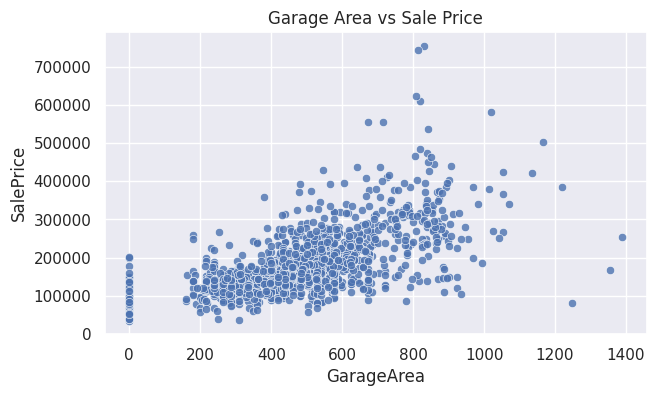

In [16]:
# Plot Garage Area vs Sale Price
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
ax = sns.scatterplot(data=df, y='SalePrice', x='GarageArea', alpha=0.8)
plt.title("Garage Area vs Sale Price");

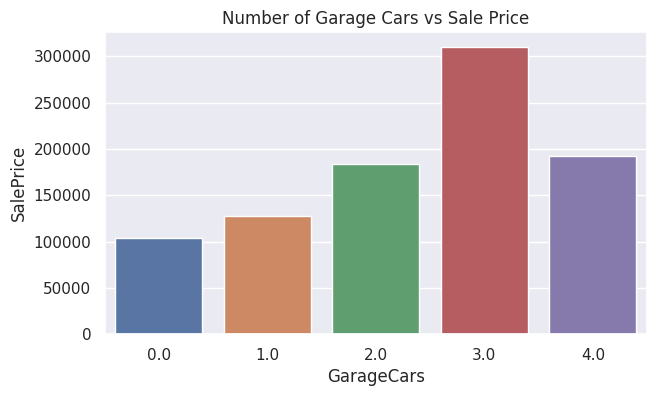

In [17]:
# Plot Garage Cars vs Sale Price
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
ax = sns.barplot(data=df, y='SalePrice', x='GarageCars', ci=0)
plt.title("Number of Garage Cars vs Sale Price")
plt.xlim(-0.5, 4.5);

# 4. Dealing with Missing Data

In [18]:
# Display the number of null values for each feature
df.isnull().sum().sort_values()

MSSubClass        0
Heating           0
HeatingQC         0
1stFlrSF          0
2ndFlrSF          0
               ... 
SalePrice      1459
Fence          2346
Alley          2719
MiscFeature    2812
PoolQC         2908
Length: 81, dtype: int64

From the above result, `SalePrice` label has 1459 values missing for the test data set. The original test data set does not contain `SalePrice` label. For data cleaning purpose, the concatenated data set created `SalePrice` column and filled NaN values for the test data rows. This will be removed later.

In [19]:
# Function for calculating the missing values in percentage 
def null_perc(df):
    df = df.drop('SalePrice', axis=1)
    null_data_perc = 100 * df.isna().mean()
    null_data_perc = null_data_perc[null_data_perc > 0].sort_values()
    
    return null_data_perc

# Function for counting the missing values for each column 
def null_count(df):
    df = df.drop('SalePrice', axis=1)
    null_data_count = df.isnull().sum()
    null_data_count = null_data_count[null_data_count > 0].sort_values()
    return null_data_count

# Display the percentage of NaN for each feature
print('Percentage of missing values for each column in ascending order:\n')
print(null_perc(df))

Percentage of missing values for each column in ascending order:

TotalBsmtSF      0.034282
GarageArea       0.034282
GarageCars       0.034282
KitchenQual      0.034282
Electrical       0.034282
BsmtUnfSF        0.034282
BsmtFinSF2       0.034282
BsmtFinSF1       0.034282
SaleType         0.034282
Exterior1st      0.034282
Exterior2nd      0.034282
Functional       0.068564
Utilities        0.068564
BsmtHalfBath     0.068564
BsmtFullBath     0.068564
MSZoning         0.137127
MasVnrArea       0.788481
MasVnrType       0.822763
BsmtFinType1     2.708262
BsmtFinType2     2.742544
BsmtQual         2.776826
BsmtCond         2.811107
BsmtExposure     2.811107
GarageType       5.382242
GarageCond       5.450806
GarageQual       5.450806
GarageYrBlt      5.450806
GarageFinish     5.450806
LotFrontage     16.660953
FireplaceQu     48.680151
Fence           80.425094
Alley           93.212204
MiscFeature     96.400411
PoolQC          99.691464
dtype: float64


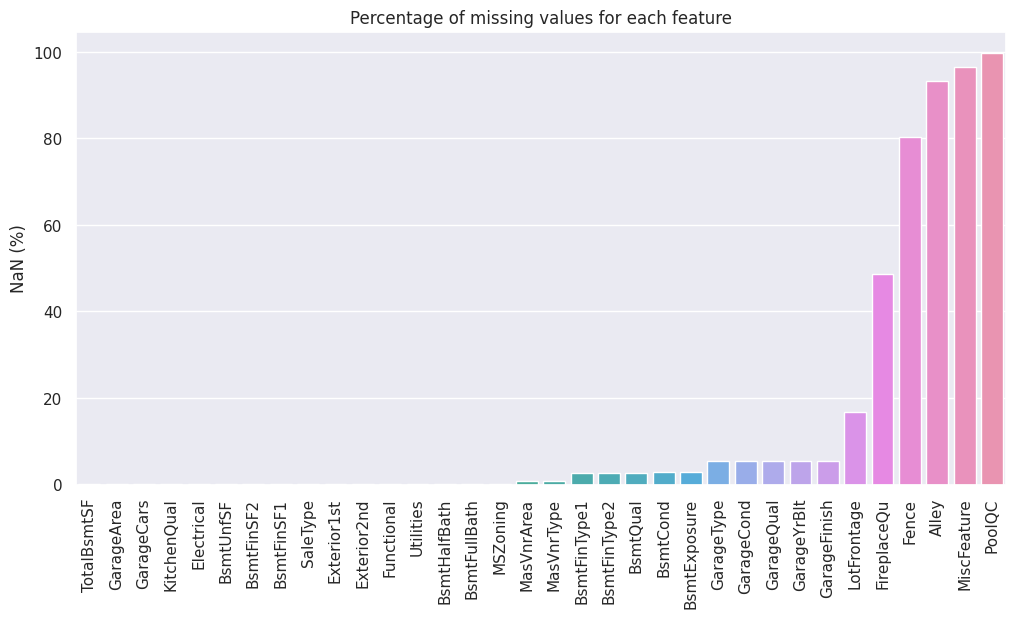

In [20]:
# Percentage of missing values for each feature
plt.figure(figsize=(12,6), dpi=100)
sns.barplot(x=null_perc(df).index, y=null_perc(df).values)
plt.title('Percentage of missing values for each feature')
plt.ylabel('NaN (%)')
plt.xticks(rotation=90);

The above barplot displays the percentage of null values for each feature. Let's go through missing values for each feature.

The "data_description.txt" file has all the necessary information for dealing with missing values. 

### Features: MasVnrType & MasVnrArea

The Masonry veneer type (`MasVnrType`) has five classifications (Brick Common, Brick Face, Cinder Block, Stone, and None). For rows that are missing the values for `MasVnrType`, the NaN can be replaced with "NA" (None).

If `MasVnrType` is "NA", then the Masonry veneer area in sq. feet (`MasVnrArea`) should be zero.

In [21]:
# Display the dataframe for MasVnrType is null
df[df['MasVnrType'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
234,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,5,2010,WD,Normal,216500.0,train
529,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624.0,train
650,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,5,2008,WD,Normal,205950.0,train
936,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2009,WD,Normal,184900.0,train
973,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,12,2008,New,Partial,182000.0,train
977,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,11,2007,New,Partial,199900.0,train
1243,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2006,New,Partial,465000.0,train
1278,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,3,2008,WD,Normal,237000.0,train
231,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,7,2009,WD,Normal,NaN,test
246,20,FV,90.0,7993,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,10,2009,New,Partial,NaN,test


In [22]:
# Filling MasVnrType and MasVnrArea with 'NA' and 0.0 respectively.
df['MasVnrType'] = df['MasVnrType'].fillna('NA')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0.0)

### Features: Electrical

The `Electrical` feature has five different electrical system categories. The missing values of `Electrical` column can be replaced with the electrical system that has highest frequency. This can be done with "mode" operation.

In [23]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

print(f'Updated - Missing values count for each feature: \n\n{null_count(df)}')

Updated - Missing values count for each feature: 

SaleType           1
GarageArea         1
GarageCars         1
Exterior1st        1
Exterior2nd        1
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
BsmtFinSF2         1
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
MSZoning           4
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtCond          82
BsmtExposure      82
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
LotFrontage      486
FireplaceQu     1420
Fence           2346
Alley           2719
MiscFeature     2812
PoolQC          2908
dtype: int64


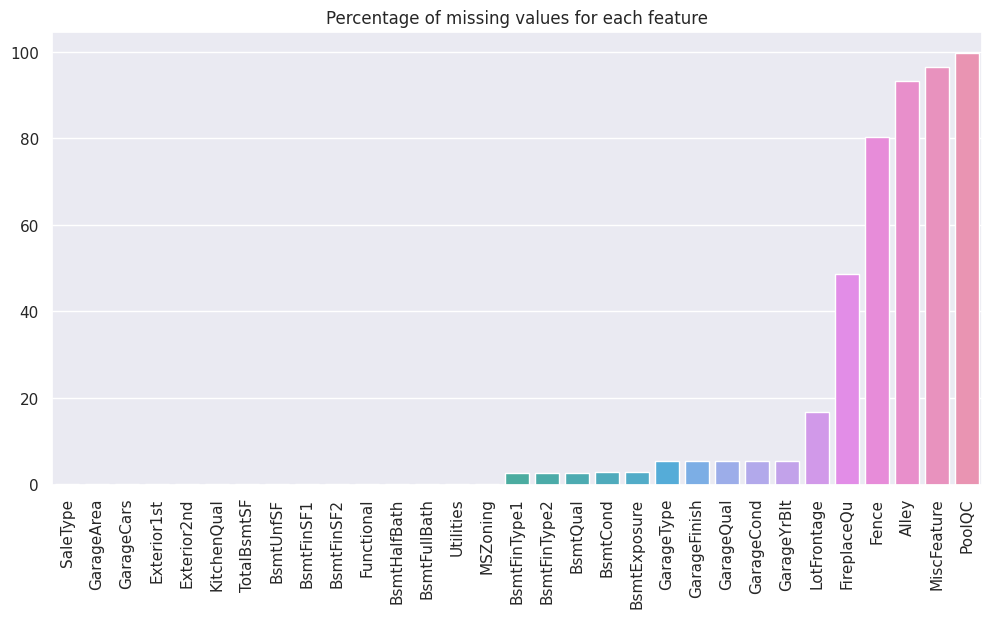

In [24]:
# Plotting the updated result of missing values in percentage for remaining features
plt.figure(figsize=(12,6), dpi=100)
sns.barplot(x=null_perc(df).index, y=null_perc(df).values)
plt.title('Percentage of missing values for each feature')
plt.xticks(rotation=90);

### Features: Basement and Garage

Columns such as `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1` and`BsmtFinType2` are related to basement of the house. These columns are categorized based on different classes. One of the classes is 'NA' which refers to 'No Basement'. So, the NaN of these columns can be replaced with 'NA'.

Similarly, `GarageType`, `GarageFinish`, `GarageQual`, and `GarageCond` are related to the garage of the house. The 'NA' corresponds to 'No Garage' for these garage columns.

In [25]:
basement_nan_str_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df[basement_nan_str_cols] = df[basement_nan_str_cols].fillna('NA')

garage_nan_str_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df[garage_nan_str_cols] = df[garage_nan_str_cols].fillna('NA')

Coming to the column `GarageYrBlt` (Year the garage was built), we can consider `YearBuilt` (Original construction date of the house) and `YearRemodAdd` (Remodel date) columns for dealing with missing values.

In [26]:
# The shape of the dataframe for which the 'YearBuilt' and 'YearRemodAdd' are same
df[df['YearBuilt'] == df['YearRemodAdd']].shape

(1559, 81)

In [27]:
# The shape of the dataframe for which the 'YearBuilt' and 'YearRemodAdd' are same
df[(df['YearBuilt'] == df['YearRemodAdd']) & (df['YearBuilt'] == df['GarageYrBlt'])].shape

(1372, 81)

There are 1559 rows that have the same year for both `YearBuilt` and `YearRemodAdd` columns. Of those, 1372 rows have `GarageYrBlt` value same as `YearRemodAdd` or `YearBuilt`. Therefore, the missing value of the `GarageYrBlt` feature can be filled with the `YearRemodAdd` feature value belonging to the same row.

In [28]:
# The 'GarageYrBlt' missing data filled with YearRemodAdd
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearRemodAdd'])

In [29]:
df[df['GarageArea'].isnull() == True]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
1116,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,NaN,test


For houses that do not have a garage, the `GarageArea` and `GarageCars` columns can be filled with zero. 

In [30]:
df[['GarageArea', 'GarageCars']] = df[['GarageArea', 'GarageCars']].fillna(0.0)

Features such as `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, and `TotalBsmtSF` are numerical columns associated with the basement of the house. So, the NaN of these columns can be replaced with zero.

 

In [31]:
basement_nan_num_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']

df[basement_nan_num_cols] = df[basement_nan_num_cols].fillna(0.0)

df[df['BsmtFullBath'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
660,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN,test
728,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,7,2008,WD,Normal,NaN,test


In [32]:
df[['BsmtFullBath', 'BsmtHalfBath']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtFullBath  2915 non-null   float64
 1   BsmtHalfBath  2915 non-null   float64
dtypes: float64(2)
memory usage: 132.9 KB


In [33]:
# Since the houses 660 and 728 have no basement, the BsmtFullBath and BsmtHalfBath can be filled with 0
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0.0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0.0)

### Feature: Fireplace Quality

In [34]:
# Checking how many houses with no fireplace and 
# displaying the NaN counts for the feature columns
print("Number of houses that do not have a fireplace : ", df[df['Fireplaces'] == 0].shape[0])
print("---"*20)
print(f'Updated number of missing column values :\n\n{null_count(df)}')

Number of houses that do not have a fireplace :  1420
------------------------------------------------------------
Updated number of missing column values :

Exterior1st       1
Exterior2nd       1
KitchenQual       1
SaleType          1
Utilities         2
Functional        2
MSZoning          4
LotFrontage     486
FireplaceQu    1420
Fence          2346
Alley          2719
MiscFeature    2812
PoolQC         2908
dtype: int64


The Fireplace quality (`FireplaceQu`) is related to the number of fireplaces column (`Fireplaces`). There are 1420 houses with no fireplaces and the number of missing `FireplaceQu` values is also the same. One of the classes for the `FireplaceQu` column is 'No Fireplace' ('NA'). Therefore, the missing values for `FireplaceQu` is filled with 'NA'.

In [35]:
# Fireplaces feature with 0 fireplace has NaN values. This is replaced with 'NA'
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')

### Features: Exterior, Kitchen Quality and Sale Type
Features such as `Exterior1st`, `Exterior2nd`, `KitchenQual`, `SaleType` are string columns. For these columns, there is no option of 'NA'. Hence these columns with NaN can be filled with the most occuring class.

In [36]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])

df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

print(f'Updated number of missing column values :\n\n{null_count(df)}')

Updated number of missing column values :

Utilities         2
Functional        2
MSZoning          4
LotFrontage     486
Fence          2346
Alley          2719
MiscFeature    2812
PoolQC         2908
dtype: int64


### Feature: Pool

In [37]:
df[df['PoolArea'] == 0].shape

(2905, 81)

In [38]:
df[df['PoolArea'] != 0][['PoolArea', 'PoolQC', 'ind']]

,PoolArea,PoolQC,ind
197,512,Ex,train
810,648,Fa,train
1170,576,Gd,train
1182,555,Ex,train
1386,519,Fa,train
1423,738,Gd,train
514,144,Ex,test
960,368,NaN,test
1043,444,NaN,test
1113,228,Ex,test


There are 2908 missing data for `PoolQC`. Also, the houses with no Pool are 2905 in numbers. But three houses with `PoolArea` have NaN values (Index: 960, 1043 and 1139). For these three houses, most occuring category of the `PoolQC` is used to fill the void.

In [39]:
df[(df['PoolArea'] == 0) & (df['PoolQC'].isnull())].shape

(2905, 81)

In [40]:
poolqc_freq = df['PoolQC'].mode()[0]

mask = (df['PoolArea'] != 0) & (df['PoolQC'].isnull())

df.loc[mask, 'PoolQC'] = df.loc[mask, 'PoolQC'].fillna(poolqc_freq)

For houses with `PoolArea` = 0, the `PoolQC` with NaN values can be replaced with 'NA'. 

In [41]:
df['PoolQC'] = df['PoolQC'].fillna('NA')

print(f'Updated number of missing column values :\n\n{null_count(df)}')

Updated number of missing column values :

Utilities         2
Functional        2
MSZoning          4
LotFrontage     486
Fence          2346
Alley          2719
MiscFeature    2812
dtype: int64


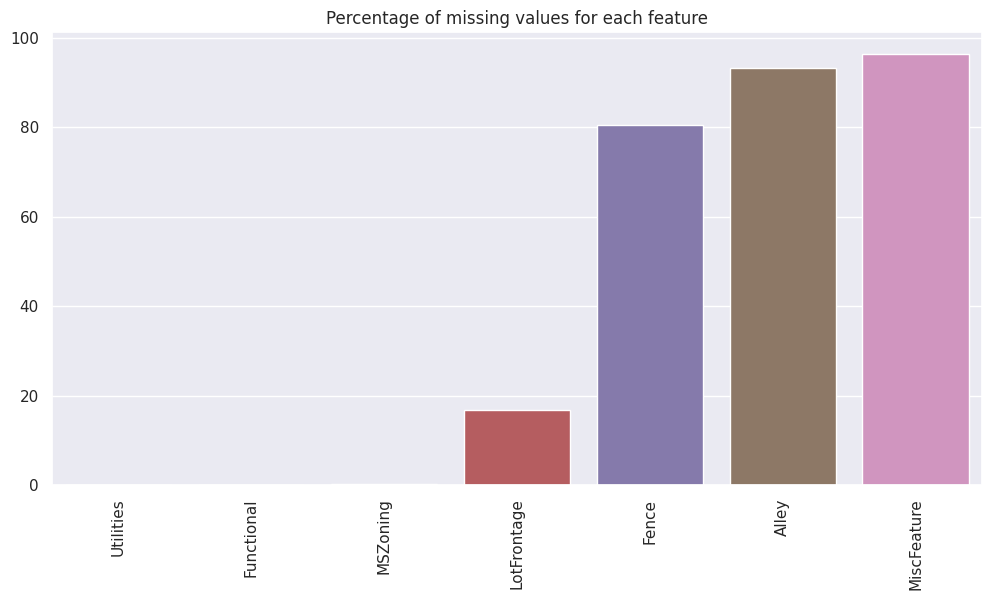

In [42]:
# Plotting the updated result of missing values in percentage for remaining features
plt.figure(figsize=(12,6), dpi=100)
sns.barplot(x=null_perc(df).index, y=null_perc(df).values)
plt.title('Percentage of missing values for each feature')
plt.xticks(rotation=90);



### Features: MiscFeature, Fence, Alley, Utilities, Functional, MSZoning

Like `PoolQC`, the `MiscFeature`, `Fence` and `Alley` columns are also filled with 'NA' because there is a class 'NA' given for each of the above mentioned feature.

`Utilities`, `Functional` and `MSZoning` columns do not have 'NA' category. Hence these columns with NaN values are filled with the mode operation.

In [43]:
# Miscellaneous feature not covered in other categories
df['MiscFeature'] = df['MiscFeature'].fillna('NA')

# Fence quality
df['Fence'] = df['Fence'].fillna('NA')

# Type of alley access to property
df['Alley'] = df['Alley'].fillna('NA')

# Type of utilities available
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])

# Home functionality
df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])

# Identifies the general zoning classification of the sale
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

# Now the only column with null values is LotFrontage
print(f'Remaining number of missing column values :\n\n{null_count(df)}')

Remaining number of missing column values :

LotFrontage    486
dtype: int64


### Feature: LotFrontage

In [44]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ind
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,NA,NA,NA,0,2,2008,WD,Normal,208500.0,train
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,NA,NA,NA,0,5,2007,WD,Normal,181500.0,train
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,NA,NA,NA,0,9,2008,WD,Normal,223500.0,train
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,NA,NA,NA,0,2,2006,WD,Abnorml,140000.0,train
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,NA,NA,NA,0,12,2008,WD,Normal,250000.0,train


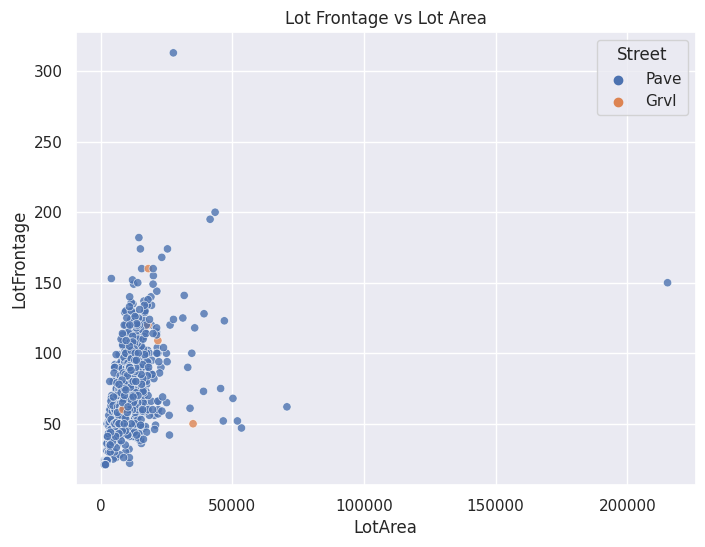

In [45]:
plt.figure(figsize=(8,6), dpi=100)
sns.scatterplot(data=df, x='LotArea', y='LotFrontage', hue='Street', alpha=0.8)
plt.title('Lot Frontage vs Lot Area');

The relationship between `LotArea` and `LotFrontage` is shown above. The missing values in the `LotFrontage` column can be filled by taking the mean of the `LotFrontage` values.

In [46]:
df["LotFrontage"] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

# Should display empty array
print(f'Remaining number of missing column values :\n{null_count(df)}')

Remaining number of missing column values :
Series([], dtype: int64)


# 5. Dummy Variables for Categorical Features

This step involves transformation of categorical string data into numerical values as most algorithms do not accept string data. There are two approaches to transform the string data:
    
 1. **Integer encoding:** With integer encoding, the string data can be directly converted into integers. The disadvantage is the implication of ordered relationship between categories.

 2. **Dummy Variables (One-hot encoding):** Dummy variables convert string category into individual features with values being 0 or 1. This would lead to increase in number of columns. With pd.get_dummies(), the categorical features are converted to numerical values. However, there are two issues associated with dummy variable encoding.

> * Multicollinearity issue
> * Mismatch of train and test data columns.

> The multicollinearity issue arises when multiple features are overlapping and this affects the prediction of the target variable. This could be resolved by dropping one of the columns with the help of "drop_first" parameter.

Now, the dataframe is split into train and test data set for training the Machine Learning Model to predict the price of each house.


In [47]:
# The df dataframe is split based on the "ind" column.
test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]

# Drop the 'ind' column as it is not needed.
test = test.drop('ind', axis=1)
train = train.drop('ind', axis=1)

# Splitting train data set into Features and Label
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']

# The test data set contains the SalePrice column with NaN values due to concatenation that was done before.
# Now the SalePrice column can be droppped.
X_test = test.drop('SalePrice', axis=1)


X_train_enc = pd.get_dummies(X_train, drop_first=True)

X_test_enc = pd.get_dummies(X_test, drop_first=True)

print(f'Encoded X_train columns: {X_train_enc.shape[1]}')
print()
print(f'Encoded X_test columns: {X_test_enc.shape[1]}')

Encoded X_train columns: 259

Encoded X_test columns: 242


It can be seen from the above result, the test column shape does not match with the train column shape. This can be solved by saving the X_train_enc columns as list and then align the X_train_enc columns with the X_test_enc and fill the empty cells with 0.

In [48]:
enc_train_cols = X_train_enc.columns.tolist()

X_test_enc = X_test_enc.reindex(columns=enc_train_cols).fillna(0)

print(f'Encoded X_train columns: {X_train_enc.shape[1]}')
print()
print(f'Encoded X_test columns: {X_test_enc.shape[1]}')

Encoded X_train columns: 259

Encoded X_test columns: 259


# 6. Prediction of House Prices

For predicting the sale price of the house, four models were trained: Linear Regression, Support Vector Machines - Regression, Random Forest Regressor and Gradient Boosting Regressor. With GridSearchCV, the best hyperparameters for these models were identified. However, the Gradient Boosting method resulted in better prediction than other methods. Hence the final model chosen for the evaluation of `SalePrice` was Gradient Boosting Regressor.

**Model Used:** Gradient Boosting Regressor with GridSearchCV

In [49]:
# Setup
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, GridSearchCV

In [50]:
# Model Definition
model = GradientBoostingRegressor()

# Cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Hyperparameters
n_est = [100, 500, 1000, 1500]
lr_rate = [0.02, 0.05, 0.1]
mx_depth = np.arange(2,7)
mx_feat = ['sqrt', 'log2']

params = {'n_estimators' : n_est, 'learning_rate' : lr_rate, 
            'max_depth' : mx_depth, 'max_features' : mx_feat}

# Grid Search CV
grid_gb = GridSearchCV(estimator=model, param_grid=params, cv=kfold, 
                       scoring='neg_root_mean_squared_error', n_jobs=-1)

# Model fitting
grid_gb.fit(X_train_enc, y_train)

# Storing the results of GridSearchCV in a dataframe
cv_df = pd.DataFrame(grid_gb.cv_results_)
best = grid_gb.best_params_

print(f'Best Parameters: {best}')

print(f'Best Score (Negative RMSE): {grid_gb.best_score_}')

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 1500}
Best Score (Negative RMSE): -21297.691174538024


In [51]:
# Evaluation based on final Gradient Boosting model
final_model = GradientBoostingRegressor(learning_rate=best['learning_rate'], 
                                        max_features=best['max_features'],
                                        n_estimators=best['n_estimators'])

final_model.fit(X_train_enc, y_train)

predictions = final_model.predict(X_test_enc)

predictions = pd.DataFrame({'Id' : df_test['Id'], 'SalePrice' : predictions})

predictions.head()

,Id,SalePrice
0,1461,123331.603420
1,1462,164669.667962
2,1463,193616.900059
3,1464,198451.846300
4,1465,181196.247715


In [52]:
# Saving the predictions as a .csv file
output = predictions.to_csv("submission_gb.csv", index=False)

# 7. Conclusion

The house price prediction task involved the following: data visualization, handling of outliers, replacing the null values for feature columns, converting categorical data into binary values and finally training the model with Gradient Boosting Regressor for evaluation. This project can be extended by implementing XGBoost model and compare it with other regression models. 

# 8. References

1. Detecting and Handling Outliers with Pandas: https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8

2. Beware of the Dummy variable trap in pandas: https://towardsdatascience.com/beware-of-the-dummy-variable-trap-in-pandas-727e8e6b8bde

3. Google Machine Learning Education: https://developers.google.com/machine-learning

4. Scikit-Learn Metrics and Scoring: https://scikit-learn.org/stable/modules/model_evaluation.html
 